In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_data_df, city_data_df, how="outer", on="city")


# Display the data table for preview
pyber_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

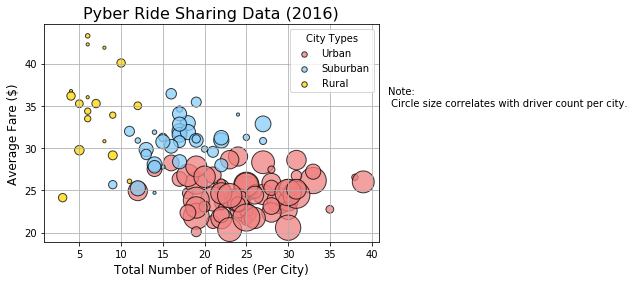

In [2]:
# Obtain the x and y coordinates for each of the three city types
#Get DataFrame with just Urban Cities
urban_df = pyber_df.loc[(pyber_df.type == "Urban")]

#x-axis for Urban cities is obtained by counting the ride_id's per city using the group function
tot_rides_urban = urban_df.groupby("city").ride_id.count()

#y-axis for Urban cities is obtained by getting the avg fare per city
avg_fare_urban = urban_df.groupby("city").fare.mean()

#size of the circle is determined by the driver count per city
driver_ct_urban = urban_df.groupby("city").driver_count.mean()

#plot the Urban information
urban = plt.scatter(tot_rides_urban, avg_fare_urban, facecolors="lightcoral", alpha=0.75, edgecolor="black", linewidth=1.0, label="Urban", s=(driver_ct_urban*10))

#____________________________________________________________________#

#Get DataFrame with just Suburban Cities
suburban_df = pyber_df.loc[(pyber_df.type == "Suburban")]

#x-axis for Suburban cities is obtained by counting the ride_id's per city using the group function
tot_rides_suburban = suburban_df.groupby("city").ride_id.count()

#y-axis for Suburban cities is obtained by getting the avg fare per city
avg_fare_suburban = suburban_df.groupby("city").fare.mean()

#size of the circle is determined by the driver count per city
driver_ct_suburban = suburban_df.groupby("city").driver_count.mean()

#plot the Suburban information
suburban = plt.scatter(tot_rides_suburban, avg_fare_suburban, facecolors="lightskyblue", alpha=0.75, edgecolor="black", linewidth=1.0, s=(driver_ct_suburban*10), label="Suburban")

#____________________________________________________________________#

#Get DataFrame with just Rural Cities
rural_df = pyber_df.loc[(pyber_df.type == "Rural")]

#x-axis for Rural cities is obtained by counting the ride_id's per city using the group function
tot_rides_rural = rural_df.groupby("city").ride_id.count()

#y-axis for Rural cities is obtained by getting the avg fare per city
avg_fare_rural = rural_df.groupby("city").fare.mean()

#size of the circle is determined by the driver count per city
driver_ct_rural = rural_df.groupby("city").driver_count.mean()

#plot the Rural information
rural = plt.scatter(tot_rides_rural, avg_fare_rural, facecolors="gold", alpha=0.75, edgecolor="black", linewidth=1.0, s=(driver_ct_rural*10), label="Rural")

#____________________________________________________________________#

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)", fontsize="16")
plt.xlabel("Total Number of Rides (Per City)", fontsize="12")
plt.ylabel("Average Fare ($)", fontsize="12")
plt.grid()
plt.axis("tight")

# Create a legend
legend = plt.legend(title="City Types", handles=[urban, suburban, rural], loc="best")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \n Circle size correlates with driver count per city.", fontsize=10)

# Save Figure
plt.savefig("Bubble_Plot_of_Ride_Sharing_Data.png", bbox_inches = "tight")

plt.show()



## Total Fares by City Type

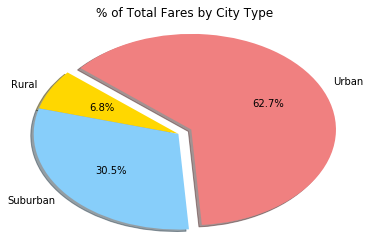

In [3]:
# Calculate Type Percents
percent_group = pyber_df[["type","fare"]]

fares_sum = percent_group.groupby("type").sum()

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]

labels = ["Rural", "Suburban", "Urban"]

explode = (0,0,0.1)

plt.pie(fares_sum.fare, autopct="%1.1f%%", colors=colors, startangle=140, shadow=True, explode=explode, labels=labels)

plt.title("% of Total Fares by City Type")

plt.axis("tight")



#DJ personal note of creating pie plot from pandas df
# fares_sum_plot = fares_sum.plot(kind="pie", y="fare", autopct="%1.1f%%", colors=colors, startangle=140, shadow=True, title = "% of Total Fares by City Type")

# Save Figure
plt.savefig("Percentage_of_Total_Fares_by_City_Type.png")

plt.show()

## Total Rides by City Type

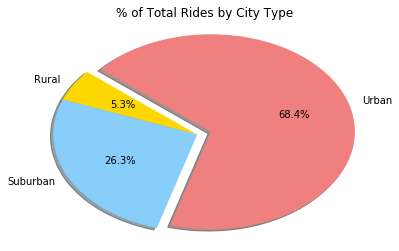

In [4]:
# Calculate Ride Percents
tot_rides = pyber_df[["type","ride_id"]]

count = tot_rides.groupby("type").ride_id.count()

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]

labels = ["Rural", "Suburban", "Urban"]

explode = (0,0,0.1)

plt.pie(count, autopct="%1.1f%%", colors=colors, startangle=140, shadow=True, explode=explode, labels=labels)

plt.title("% of Total Rides by City Type")

plt.axis("tight")


# Save Figure

plt.savefig("Percentage_of_Total_Rides_by_City_Type.png")

plt.show()

## Total Drivers by City Type

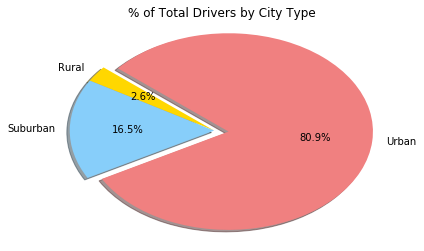

In [5]:
# Calculate Driver Percents
tot_drivers_list = [driver_ct_rural.sum(), driver_ct_suburban.sum(), driver_ct_urban.sum()]

colors = ["gold", "lightskyblue", "lightcoral"]

labels = ["Rural", "Suburban", "Urban"]

explode = (0,0,0.1)

plt.pie(tot_drivers_list, autopct="%1.1f%%", colors=colors, startangle=140, shadow=True, explode=explode, labels=labels)

plt.title("% of Total Drivers by City Type")

plt.axis("tight")



# Save Figure
plt.savefig("Percentage_of_Total_Drivers_by_City_Type.png")

plt.show()

## Written Description of Three Observable Trends

####  1. The majority of Drivers are concentrated in Urban city types
####  2. There are a higher number of total rides with a lower average fare in urban cities with a denser population. The trip duration in urban cities is probably lower than in suburban and rural areas. 
####  3. As a full time driver it would probably make the most sense to pick a suburban area as there is less driver competition and higher fares.

### This code block was an attempt to perform scatter and then do conditional formatting to color the circles. 

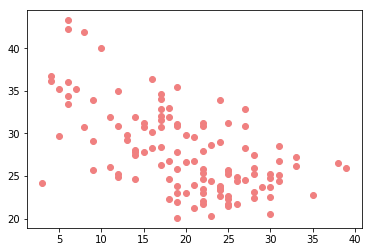

In [6]:
# Obtain the x and y coordinates for each of the three city types
group_by_type = pyber_df.groupby(["type","city"])

#x-axis for all scatters
tot_num_rides = group_by_type.ride_id.count()


avgerage_fare = group_by_type.fare.mean()


plt.scatter(tot_num_rides, avgerage_fare, facecolors="lightcoral")

plt.show()
# Build the scatter plots for each city types

# group_scatter = group_by_type.plot(kind="scatter", x=tot_num_rides, y=average_fare, grid=True)

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure